### 편의추정

In [3]:
options(repr.plot.width = 16, repr.plot.height = 9)

In [4]:
library(MASS)  ## lm.ridge
library(car)  ## vif
library(glmnet)  ## ridge, lasso

Loading required package: carData

Loading required package: Matrix

Loaded glmnet 4.1-8



### 완전한 다중공선성 (Perfect multicollinearity)

완전한 다중공선성을 갖는 데이터 생성

In [5]:
gen_perfect_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 80, sd = 10)
    x2 = rnorm(n = num_samples, mean = 70, sd = 5)
    x3 = 2 * x1 + 4 * x2 + 3  ## x3는 완벽한 선형 결합으로 이뤄져 있음.
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)
    data.frame(y, x1, x2, x3)
}

In [7]:
set.seed(42)
perfect_collin_data = gen_perfect_collin_data()
head(perfect_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,170.7135,93.70958,76.00483,494.4385
2,152.9106,74.35302,75.22376,452.6011
3,152.7866,83.63128,64.98396,430.1984
4,170.6306,86.32863,79.24241,492.6269
5,152.3320,84.04268,66.66613,437.7499
6,151.3155,78.93875,70.52757,442.9878


In [9]:
perfect_collin_fit = lm(y~. ,perfect_collin_data)
summary(perfect_collin_fit)


Call:
lm(formula = y ~ ., data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


`x3`이 `NA`가 나온다. `x3`은 `x1, x2`의 선형결합으로 완전히 표현되기 때문이다.

In [18]:
fit1 = lm(y ~ x1 + x2, data = perfect_collin_data)  ## 전부 추가했을 때와 동일
fit2 = lm(y ~ x1 + x3, data = perfect_collin_data)
fit3 = lm(y ~ x2 + x3, data = perfect_collin_data)

summary(fit2)


Call:
lm(formula = y ~ x1 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.194542   1.750225   1.254    0.213    
x1          0.477100   0.015158  31.475   <2e-16 ***
x3          0.254265   0.005636  45.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


회귀계수를 제외한 나머지 것들은 모두 동일함.

회귀계수가 몇 배 차이가 나고, 절편 차이가 나는 것은 관계식에 따라 재표현이 가능.

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

$$\begin{align}
y & = \tilde\beta_0 + \tilde\beta_1 x_1 + \tilde\beta_3(2x_1 + 4x_2 + 3) + \epsilon \\
& = (\tilde\beta_0 + 3\tilde\beta_3) + (\tilde\beta_1 + 2\tilde\beta_3)x_1 + 4\tilde\beta_3 x_2 + \epsilon
\end{align}$$

$$\begin{align}
y & = \tilde\beta_0 + \tilde\beta_2 x_2 + \tilde\beta_3(2x_1 + 4x_2 + 3) + \epsilon \\
& = (\tilde\beta_0 + 3\tilde\beta_3) + (\tilde\beta_2 + 2\tilde\beta_3)x_2 + 4\tilde\beta_3 x_2 + \epsilon
\end{align}$$

2.957336 + 0.985629 x1 + 1.017059 x2

2.194542 + 0.477100 x1 + 0.254265 x3

2.194542 + 3$\times$0.254265 + (0.477100 + 2$\times$0.254265)x1 + 4$\times$0.254265 x2

2.957336 + 0.985629x1 + 1.017059x2

> 위처럼 성립함을 확인

### 완전에 가까운 다중공선성

In [22]:
gen_almost_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 0, sd = 2)
    x2 = rnorm(n = num_samples, mean = 0, sd = 3)
    x3 = 3*x1 + 1*x2 + rnorm(num_samples, mean=0, sd=0.5)
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)
    data.frame(y, x1, x2, x3)
}

In [23]:
set.seed(42)
almost_collin_data = gen_almost_collin_data()
head(almost_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,9.3401923,2.7419169,3.6028961,10.82818219
2,5.7650991,-1.1293963,3.1342533,-0.08704717
3,0.7556218,0.7262568,-3.0096259,-0.24519291
4,10.5462431,1.2657252,5.5454457,10.37239096
5,1.6617438,0.8085366,-2.0003202,-0.26314109
6,3.0464051,-0.2122490,0.3165414,-0.89563344


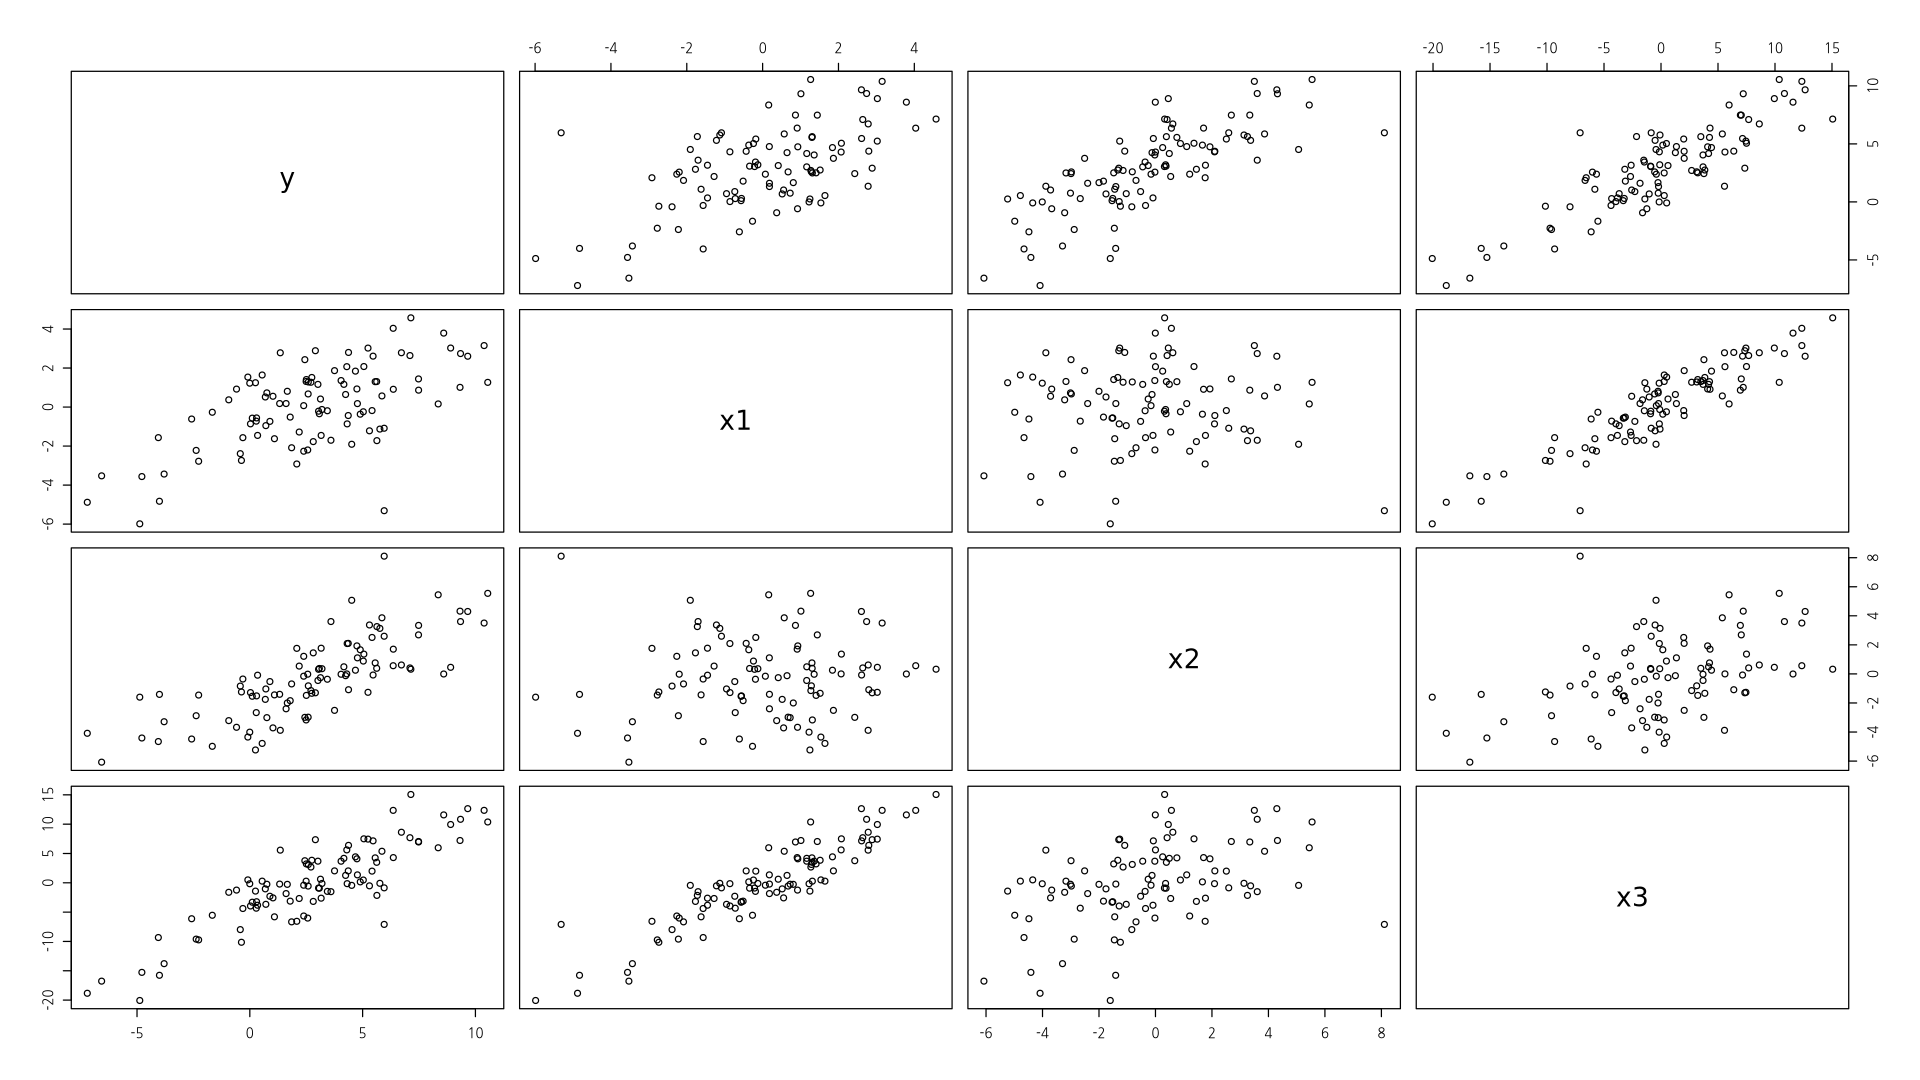

In [24]:
pairs(almost_collin_data)

다중공선성 있음...

In [27]:
round(cor(almost_collin_data), 3)

,y,x1,x2,x3
y,1.000,0.616,0.769,0.863
x1,0.616,1.000,0.031,0.913
x2,0.769,0.031,1.000,0.429
x3,0.863,0.913,0.429,1.000


In [28]:
m = lm(y~., almost_collin_data)
summary(m)


Call:
lm(formula = y ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7944 -0.5867 -0.1038  0.6188  2.3280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03150    0.08914  34.007  < 2e-16 ***
x1           1.21854    0.52829   2.307   0.0232 *  
x2           1.06616    0.18314   5.821 7.71e-08 ***
x3          -0.06322    0.17765  -0.356   0.7227    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8867 on 96 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9401 
F-statistic:   519 on 3 and 96 DF,  p-value: < 2.2e-16


일부 설명변수에 대한 회귀계수가 유의하지 못하다.

* 분산팽창지수 VIF

In [29]:
vif(m)

x1        x2        x3 
152.42684  31.07349 186.71999

> `x3`의 VIF가 제일 크고, 10 이상임.

`-` y에 노이즈를 스깜.

In [30]:
set.seed(1000)
noise = rnorm(100, 0, 0.5)

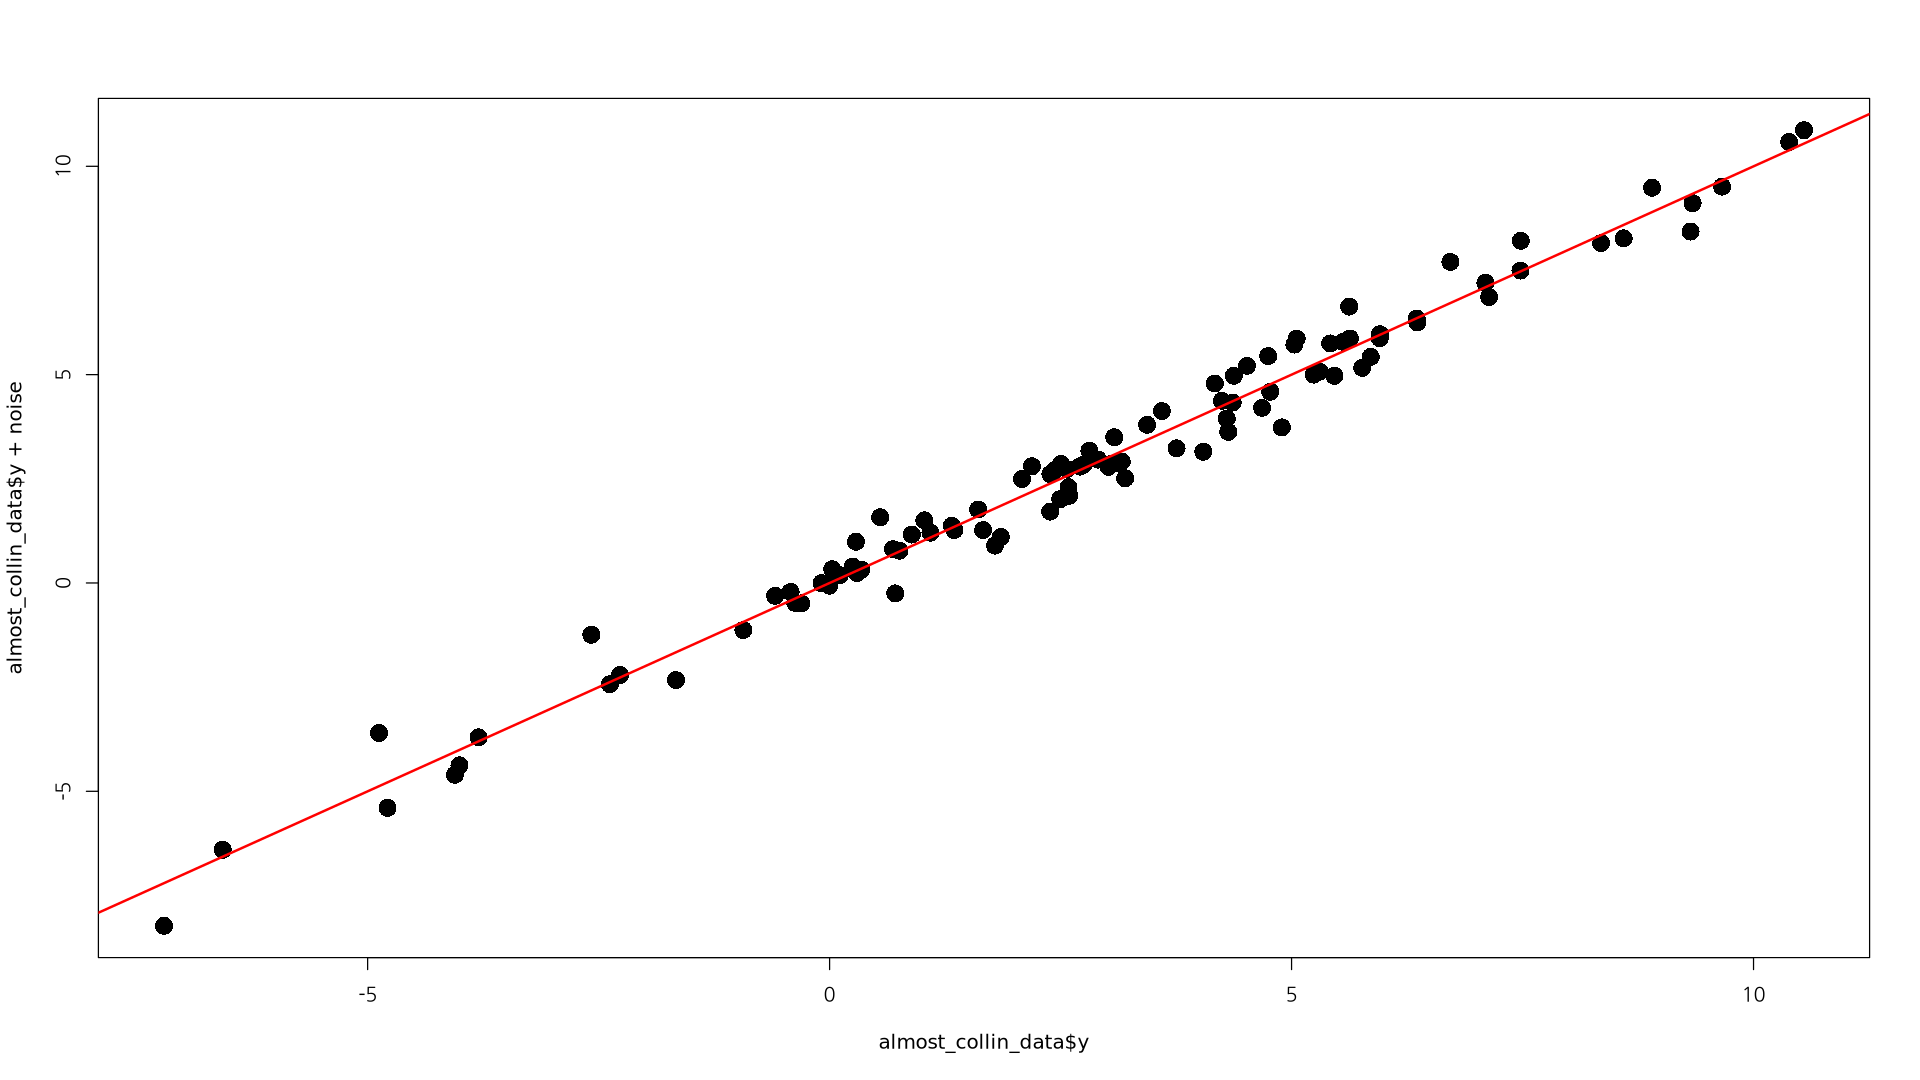

In [31]:
plot(almost_collin_data$y, almost_collin_data$y + noise, pch = 16, cex = 2)
abline(0, 1, lwd = 2, col = "red")

In [32]:
m_noise = lm(y+noise~., almost_collin_data)
summary(m_noise)


Call:
lm(formula = y + noise ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0962 -0.6998 -0.0891  0.7726  2.8462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0403     0.1020  29.815  < 2e-16 ***
x1            0.9894     0.6043   1.637    0.105    
x2            0.9898     0.2095   4.725 7.88e-06 ***
x3            0.0158     0.2032   0.078    0.938    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 96 degrees of freedom
Multiple R-squared:  0.9259,	Adjusted R-squared:  0.9236 
F-statistic:   400 on 3 and 96 DF,  p-value: < 2.2e-16


> 회귀계수가 튐.

`-` 다중공선성이 없는 경우와 비교

In [33]:
m1 = lm(y~x1+x2, almost_collin_data)
m1_noise = lm(y+noise~x1+x2, almost_collin_data)

In [34]:
summary(m1)


Call:
lm(formula = y ~ x1 + x2, data = almost_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80123 -0.58079 -0.07428  0.62428  2.29555 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03145    0.08874   34.16   <2e-16 ***
x1           1.03115    0.04262   24.20   <2e-16 ***
x2           1.00204    0.03272   30.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8827 on 97 degrees of freedom
Multiple R-squared:  0.9418,	Adjusted R-squared:  0.9406 
F-statistic: 785.5 on 2 and 97 DF,  p-value: < 2.2e-16


In [35]:
summary(m1_noise)


Call:
lm(formula = y + noise ~ x1 + x2, data = almost_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09978 -0.70050 -0.08924  0.76274  2.85434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.04031    0.10145   29.97   <2e-16 ***
x1           1.03619    0.04872   21.27   <2e-16 ***
x2           1.00584    0.03741   26.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 97 degrees of freedom
Multiple R-squared:  0.9259,	Adjusted R-squared:  0.9244 
F-statistic: 606.1 on 2 and 97 DF,  p-value: < 2.2e-16


> 오차에 따라 추정량이 크게 바뀌지 않음. 안정적임.

* $VIF = \frac{1}{1-R_j^2}$

In [42]:
m_sub = lm(x3~x1+x2, almost_collin_data)
c33 = 1/(1-summary(m_sub)$r.sq)

c33

[1] 186.72

### 실제 데이터 분석

In [45]:
dt = data.frame(scale(mtcars))  ## scaling
dim(dt)

[1] 32 11

In [46]:
head(dt)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


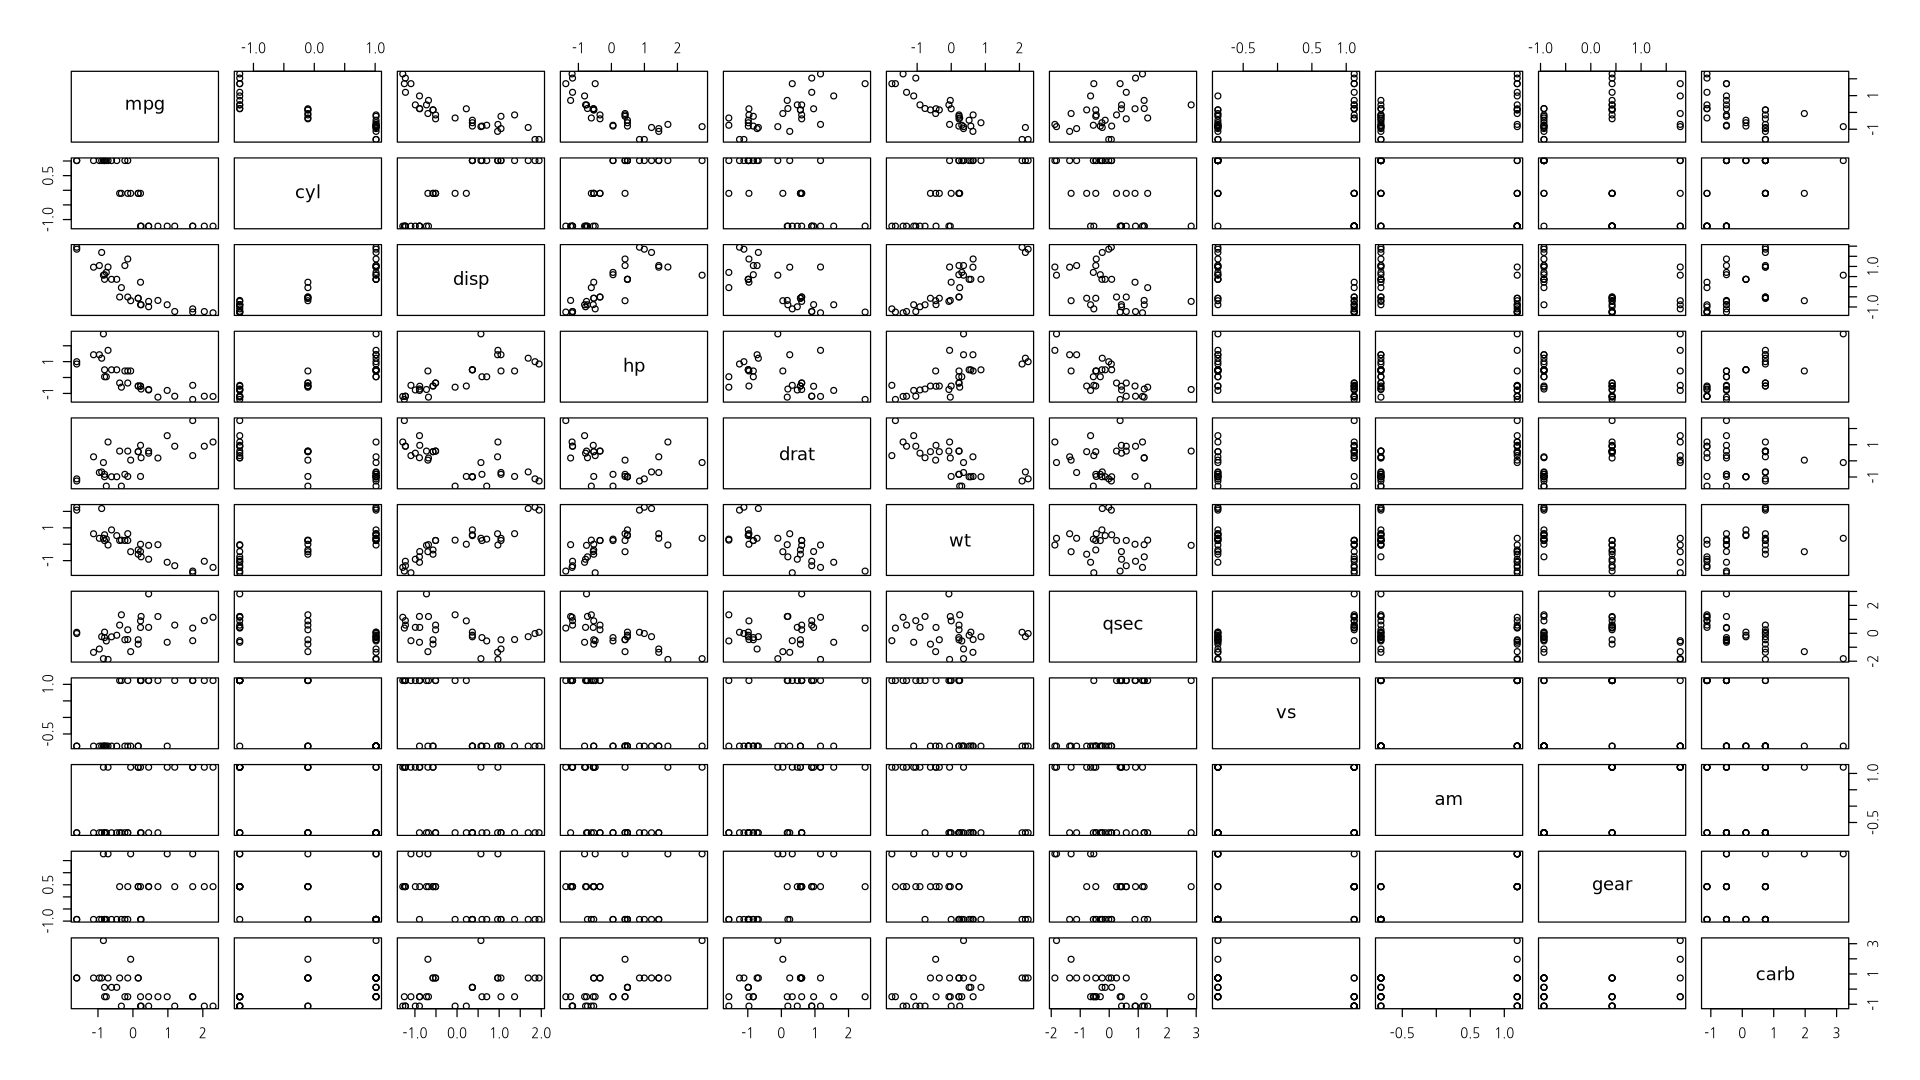

In [47]:
pairs(dt)  ## 어차피 산점도라 스케일링 상관없음

disp와 hp, wt등... 선형 상관이 있어보임.

In [50]:
round(cor(dt), 3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000,-0.852,-0.848,-0.776,0.681,-0.868,0.419,0.664,0.600,0.480,-0.551
cyl,-0.852,1.000,0.902,0.832,-0.700,0.782,-0.591,-0.811,-0.523,-0.493,0.527
disp,-0.848,0.902,1.000,0.791,-0.710,0.888,-0.434,-0.710,-0.591,-0.556,0.395
hp,-0.776,0.832,0.791,1.000,-0.449,0.659,-0.708,-0.723,-0.243,-0.126,0.750
drat,0.681,-0.700,-0.710,-0.449,1.000,-0.712,0.091,0.440,0.713,0.700,-0.091
wt,-0.868,0.782,0.888,0.659,-0.712,1.000,-0.175,-0.555,-0.692,-0.583,0.428
qsec,0.419,-0.591,-0.434,-0.708,0.091,-0.175,1.000,0.745,-0.230,-0.213,-0.656
vs,0.664,-0.811,-0.710,-0.723,0.440,-0.555,0.745,1.000,0.168,0.206,-0.570
am,0.600,-0.523,-0.591,-0.243,0.713,-0.692,-0.230,0.168,1.000,0.794,0.058
gear,0.480,-0.493,-0.556,-0.126,0.700,-0.583,-0.213,0.206,0.794,1.000,0.274


설명변수 간 상관계수가 높은 것이 많음.

`-` 무지성 회귀모형 구성

In [51]:
cars_fit_lm = lm(mpg~., dt)
summary(cars_fit_lm)


Call:
lm(formula = mpg ~ ., data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57254 -0.26620 -0.01985  0.20230  0.76773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.012e-17  7.773e-02   0.000   1.0000  
cyl         -3.302e-02  3.097e-01  -0.107   0.9161  
disp         2.742e-01  3.672e-01   0.747   0.4635  
hp          -2.444e-01  2.476e-01  -0.987   0.3350  
drat         6.983e-02  1.451e-01   0.481   0.6353  
wt          -6.032e-01  3.076e-01  -1.961   0.0633 .
qsec         2.434e-01  2.167e-01   1.123   0.2739  
vs           2.657e-02  1.760e-01   0.151   0.8814  
am           2.087e-01  1.703e-01   1.225   0.2340  
gear         8.023e-02  1.828e-01   0.439   0.6652  
carb        -5.344e-02  2.221e-01  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4397 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 1

> 회귀모형 자체는 유의한데, 회귀계수가 유의한 것이 없음 : 다중공선성이 있다.

In [52]:
round(vif(cars_fit_lm), 1)

cyl disp   hp drat   wt qsec   vs   am gear carb 
15.4 21.6  9.8  3.4 15.2  7.5  5.0  4.6  5.4  7.9

### 능형 회귀(Ridge Regression)

In [54]:
rfit = MASS::lm.ridge(mpg~., dt, lambda = seq(0.01, 20, 0.1))
# rfit  ## lambda값에 따른 계수값이 나옴

In [55]:
select(rfit)  ## 3가지의 lambda값을 제시?

modified HKB estimator is 2.58585 
modified L-W estimator is 1.837435 
smallest value of GCV  at 14.91 


In [56]:
ls(rfit)

[1] "coef"   "GCV"    "Inter"  "kHKB"   "kLW"    "lambda" "scales" "xm"    
[9] "ym"

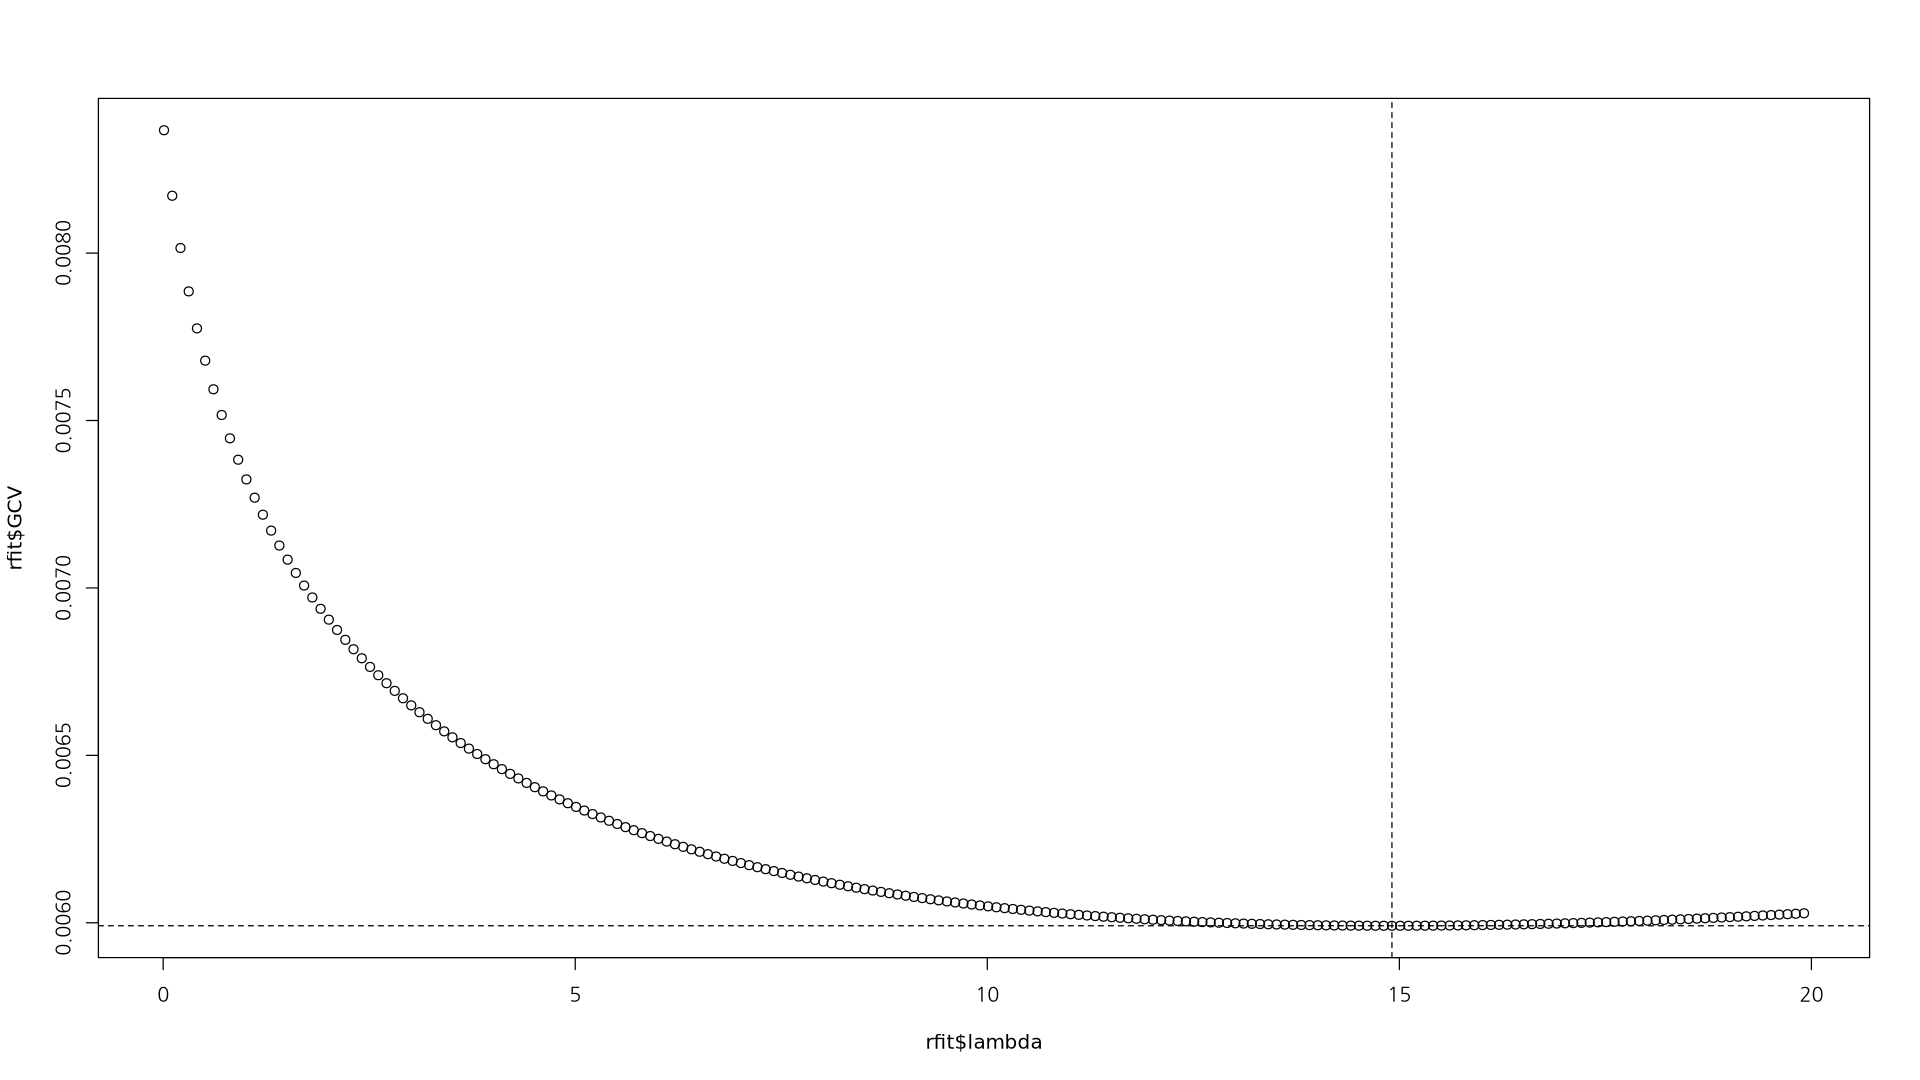

In [61]:
plot(rfit$lambda, rfit$GCV)
abline(v = 14.91, h = min(rfit$GCV), lty = 2)

> lambda값을 크게 가져갈수록 GCV가 작아지다가 어느 순간 증가함. (Generalized Cross Validation) 14.91에서 가장 작아짐.

In [67]:
coef(cars_fit_lm)  ## coefs on OLS

(Intercept)           cyl          disp            hp          drat 
-1.012268e-17 -3.302235e-02  2.742271e-01 -2.443817e-01  6.982829e-02 
           wt          qsec            vs            am          gear 
-6.031688e-01  2.434322e-01  2.657358e-02  2.086579e-01  8.023404e-02 
         carb 
-5.344363e-02

In [66]:
round(rfit$coef[, rfit$lambda == "2.51"], 3)  ## 0.1단위

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.071 -0.032 -0.147  0.085 -0.310  0.096  0.038  0.174  0.077 -0.174

In [68]:
round(rfit$coef[, rfit$lambda == "3.21"], 3)

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.078 -0.049 -0.144  0.086 -0.291  0.085  0.041  0.169  0.075 -0.175

In [69]:
round(rfit$coef[, rfit$lambda == "14.91"], 3)

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.109 -0.107 -0.130  0.092 -0.197  0.047  0.063  0.132  0.066 -0.144

`-` 계수들의 값이 0으로부터 떨어져있는 정도를 보기

In [70]:
sum(rfit$coef[, rfit$lam=="0.21"]^2)

[1] 0.4556705

In [71]:
sum(rfit$coef[, rfit$lam=="3.21"]^2)

[1] 0.1950265

In [72]:
sum(rfit$coef[, rfit$lam=="14.91"]^2)

[1] 0.1359894

> 갈수록 0 중심으로 모이고 있다(beta들의 분산이 줄어들고 있음.)

`-` 회귀계수들의 추세 도시화

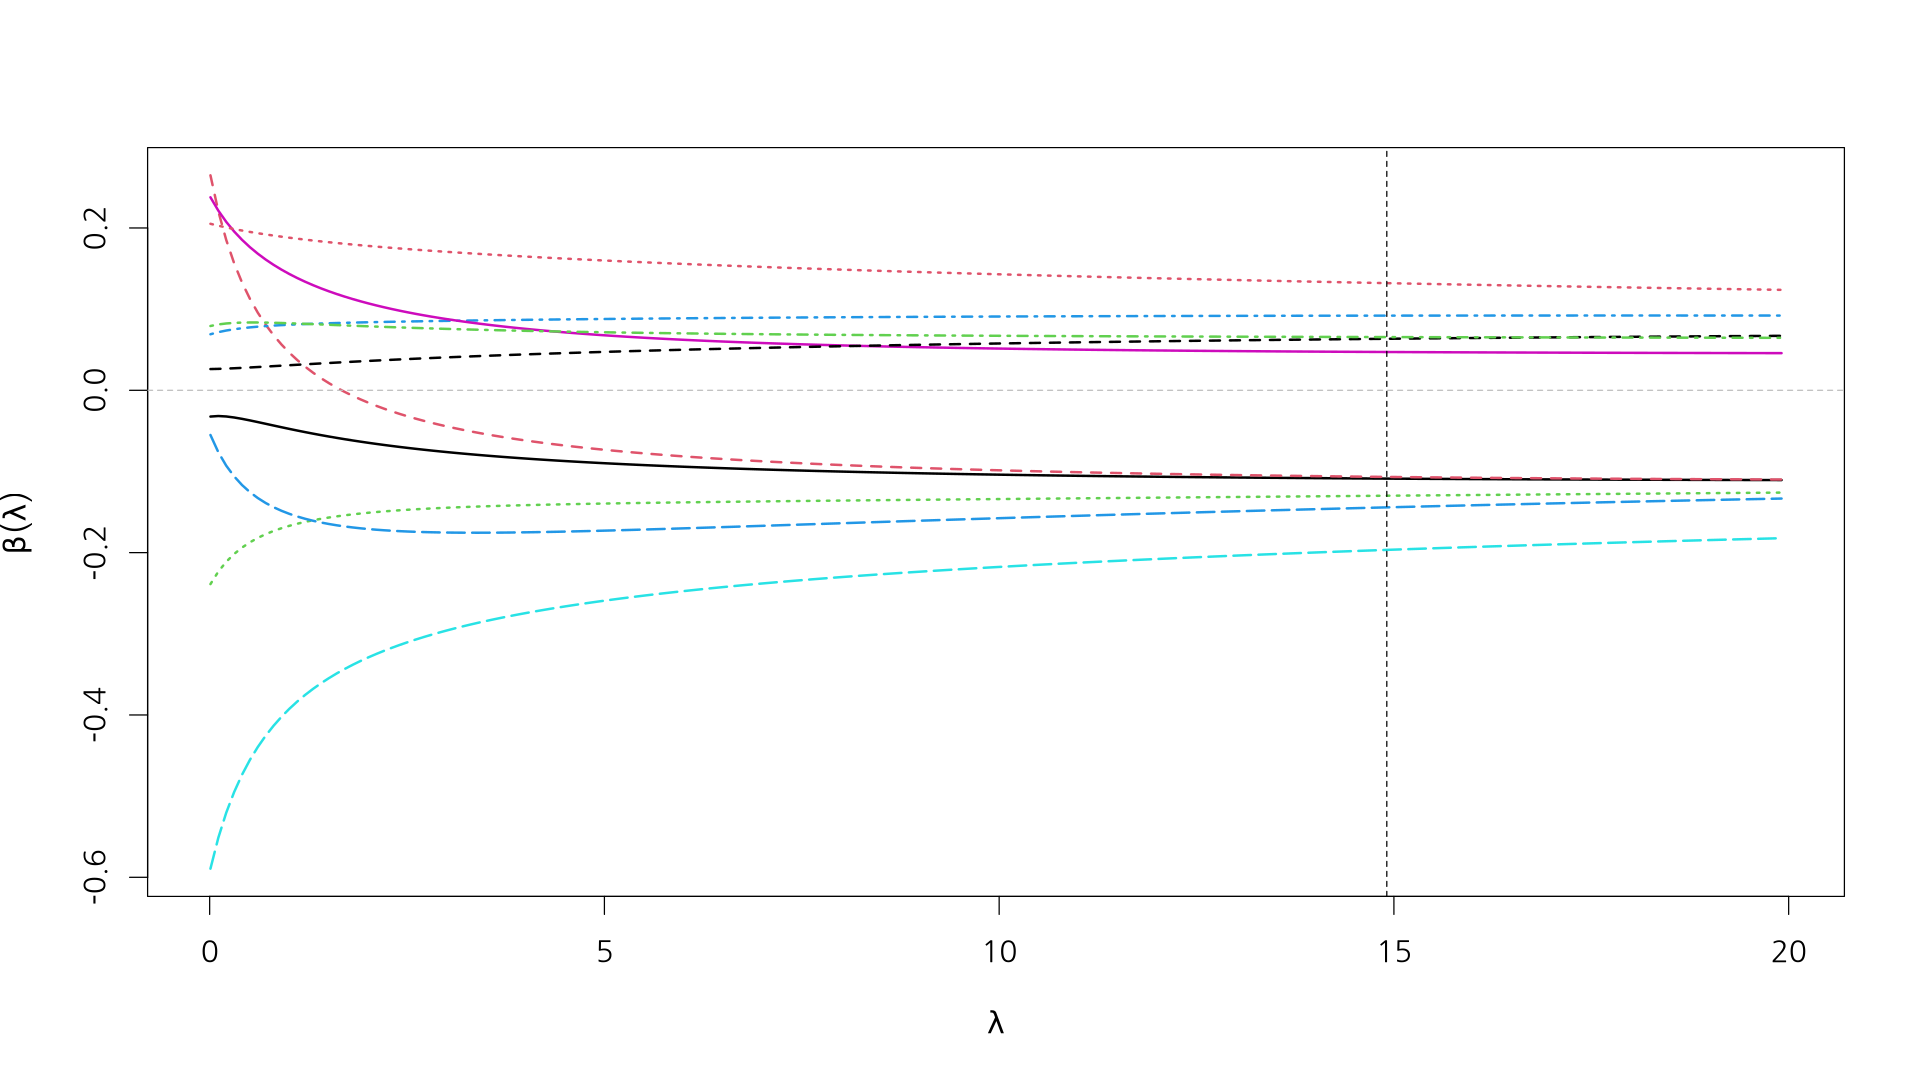

In [73]:
par(cex=1.5)
matplot(rfit$lambda, t(rfit$coef), type='l',
    xlab=expression(lambda),
    ylab=expression(bold(beta)(lambda)), lwd=2)
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)  ## GCV로서의 최적값

`-` glmnet 함수 이용

In [75]:
X = model.matrix(mpg~., dt)[, -1]  ## design matrix
y = dt$mpg  ## feature vector

head(X)
head(y)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


[1]  0.1508848  0.1508848  0.4495434  0.2172534 -0.2307345 -0.3302874

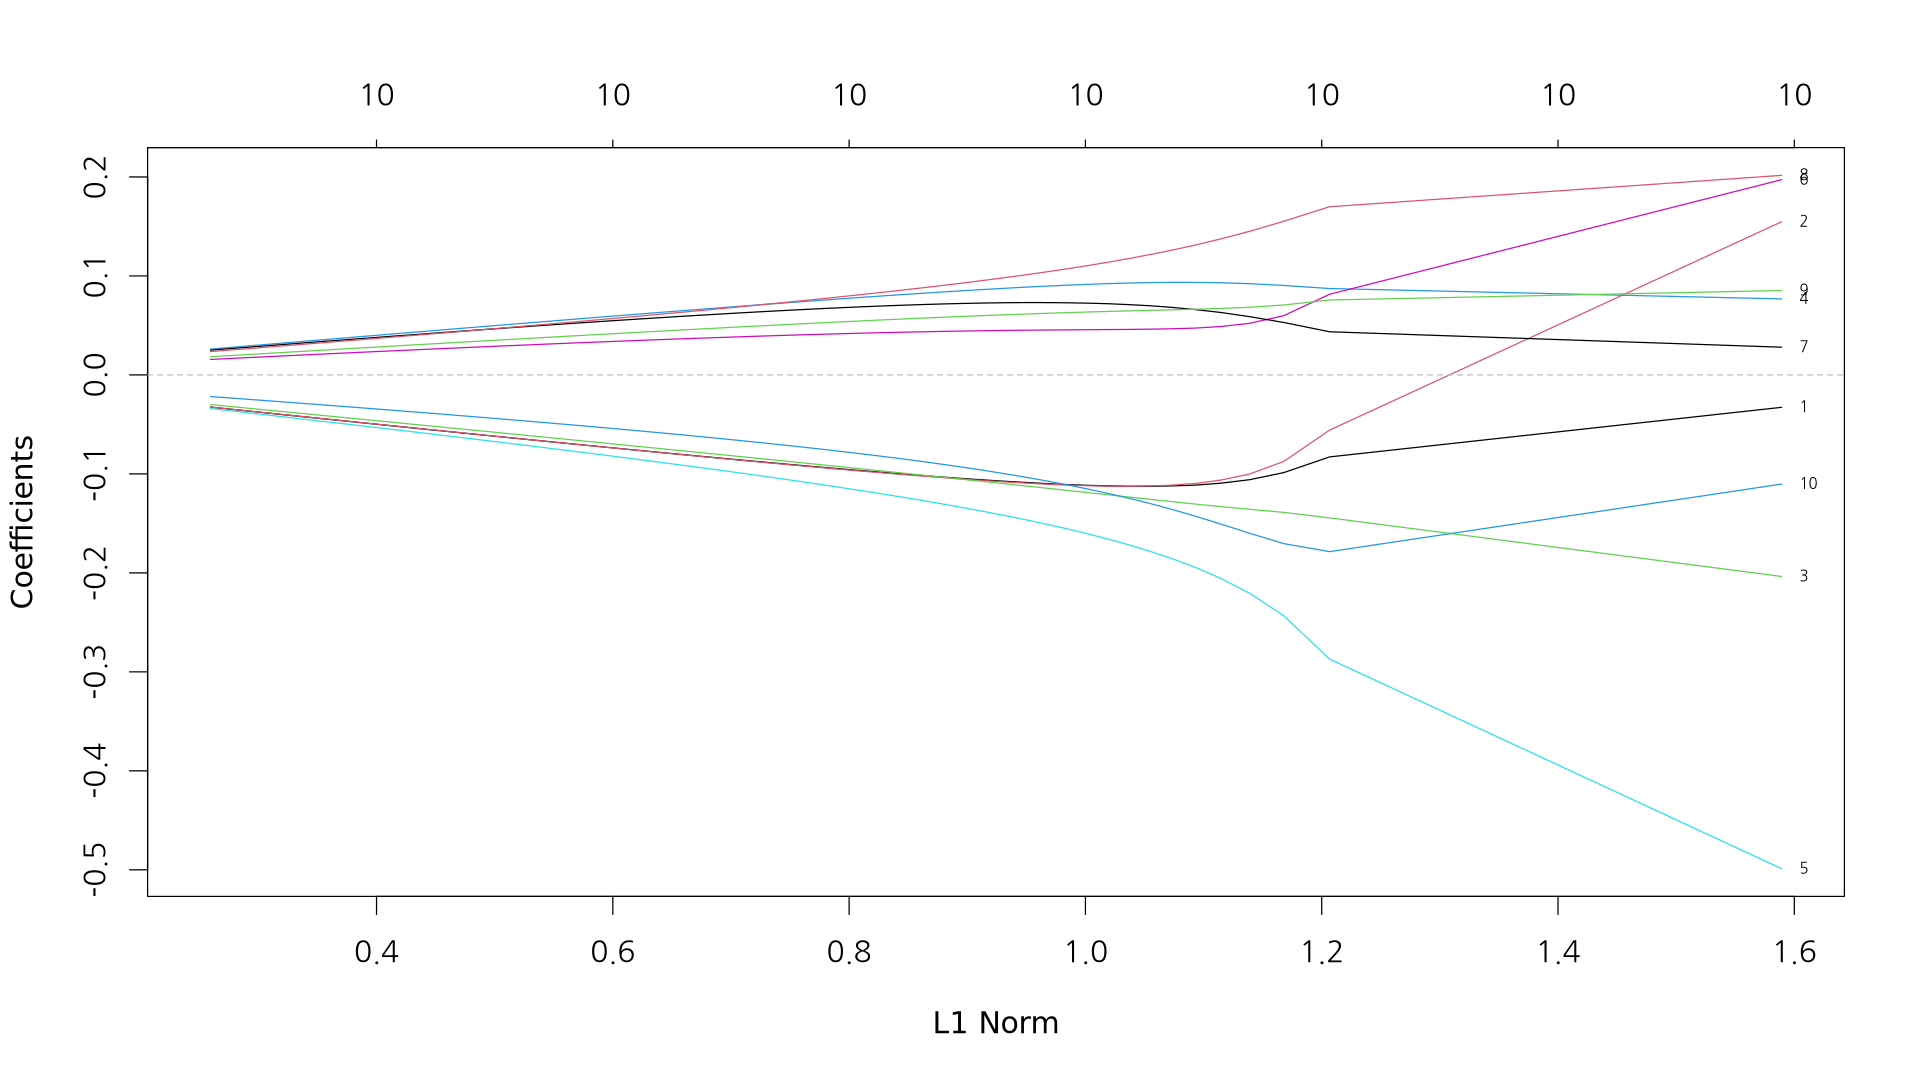

In [77]:
ridge_fit = glmnet::glmnet(X, y, alpha = 0, lambda = seq(0.01, 20, 0.1))  ## ridge : alpha = 0
## glmnet은 Ridge, Lasso, eleastic-net을 사용 가능
par(cex = 1.5)
plot(ridge_fit, label = TRUE)
abline(h = 0, col = "grey", lty = 2)

> lambda값에 따라 Norm이 축소된다. 그 값이 축소됨에 따라(왼쪽으로 갈 때) 계수들이 0에 수렴한다.

In [78]:
ls(ridge_fit)

[1] "a0"        "beta"      "call"      "dev.ratio" "df"        "dim"      
 [7] "jerr"      "lambda"    "nobs"      "npasses"   "nulldev"   "offset"

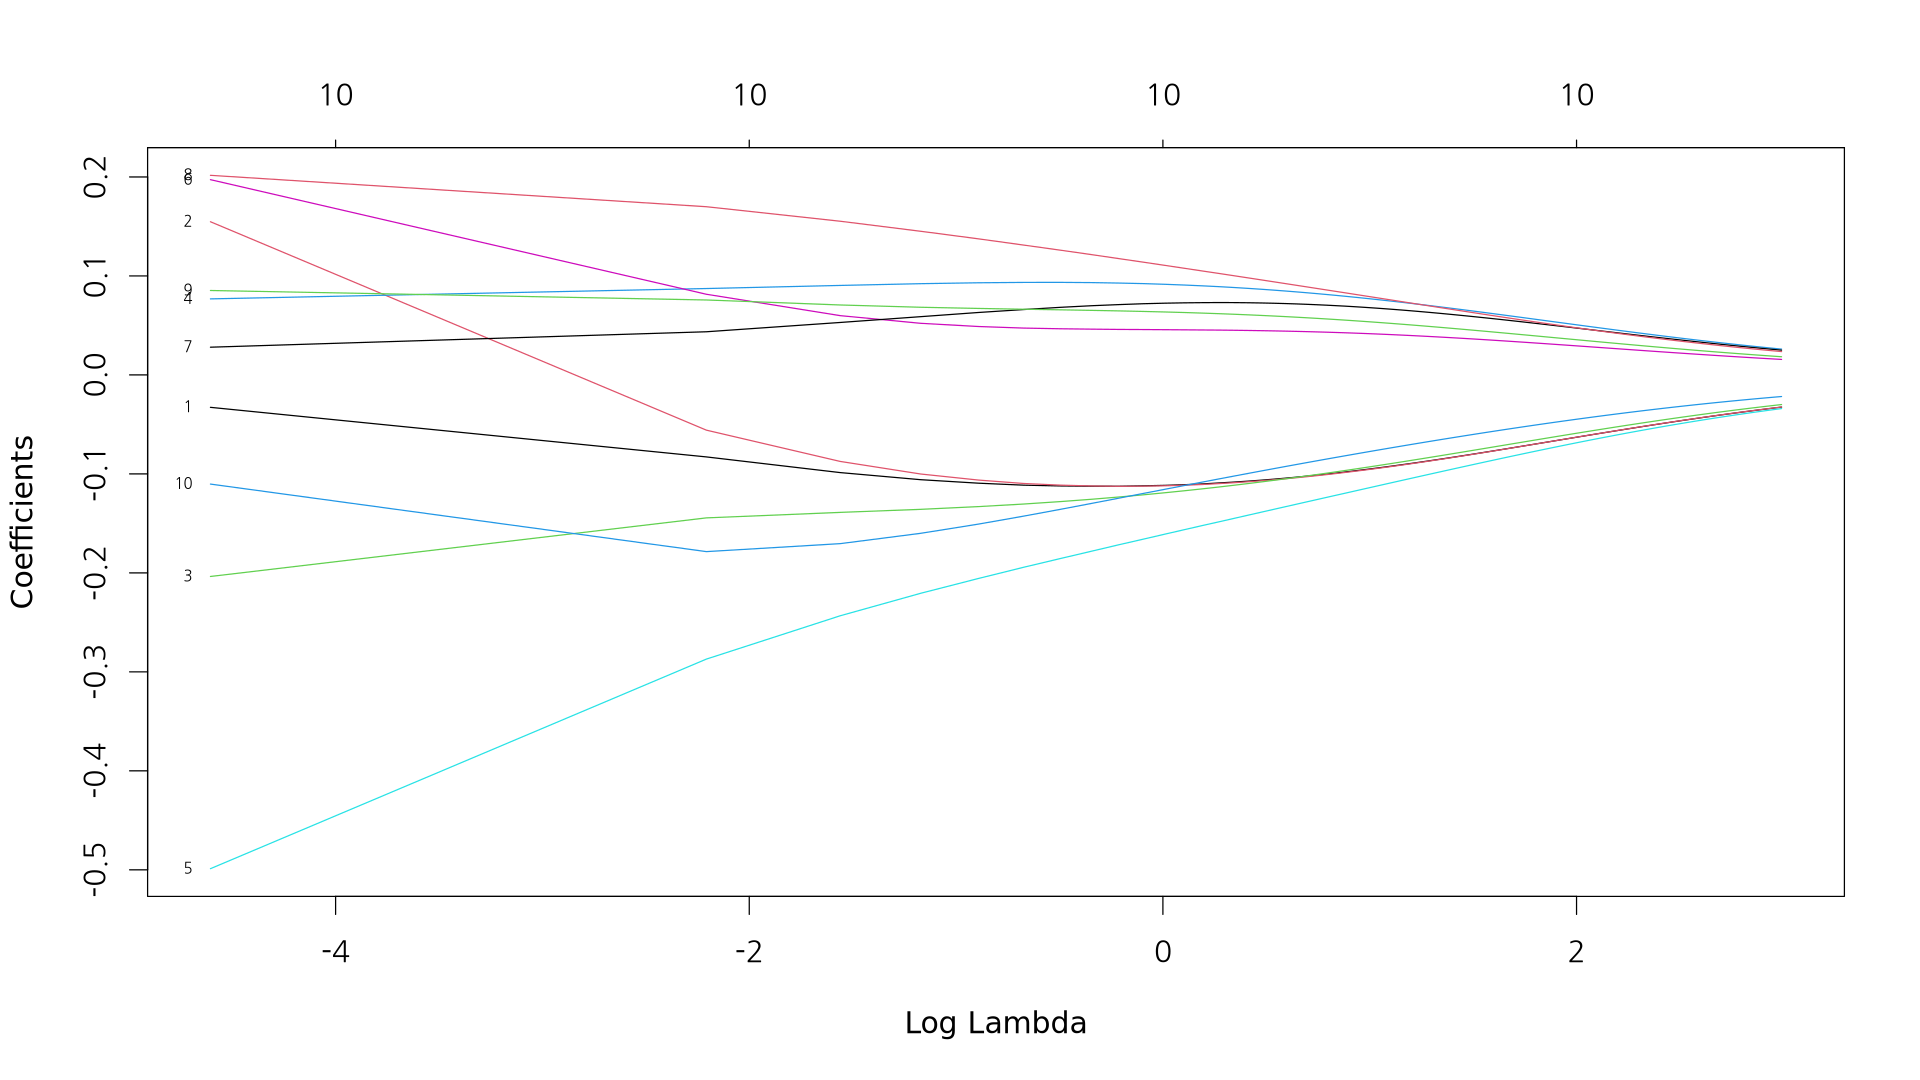

In [79]:
par(cex = 1.5)
plot(ridge_fit, label = TRUE, xvar = "lambda")

> 람다의 값이 커짐에 따라 계수들이 0에 가까워짐.

`-` validation set이 존재하는 방법

In [80]:
cv_fit = glmnet::cv.glmnet(X, y, alpha = 0, nfolds = length(y))  ## PRESS, nfolds는 k-fold

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


> 너 집단 수에 비해 데이터 너무 적어...

In [81]:
cv_fit


Call:  glmnet::cv.glmnet(x = X, y = y, nfolds = length(y), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.4558    82  0.2020 0.05006      10
1se 1.8399    67  0.2465 0.07432      10

> 비교하려는 측정값이 MSE이고, 가장 작게 해주는 lambda값이 0.4558임.

In [85]:
0.2020+0.05006  ## MSE의 표준오차가 0.05006이니까, 이 값까지 한계임

[1] 0.25206

In [84]:
log(0.4558)
log(1.8399)

[1] -0.7857012

[1] 0.6097112

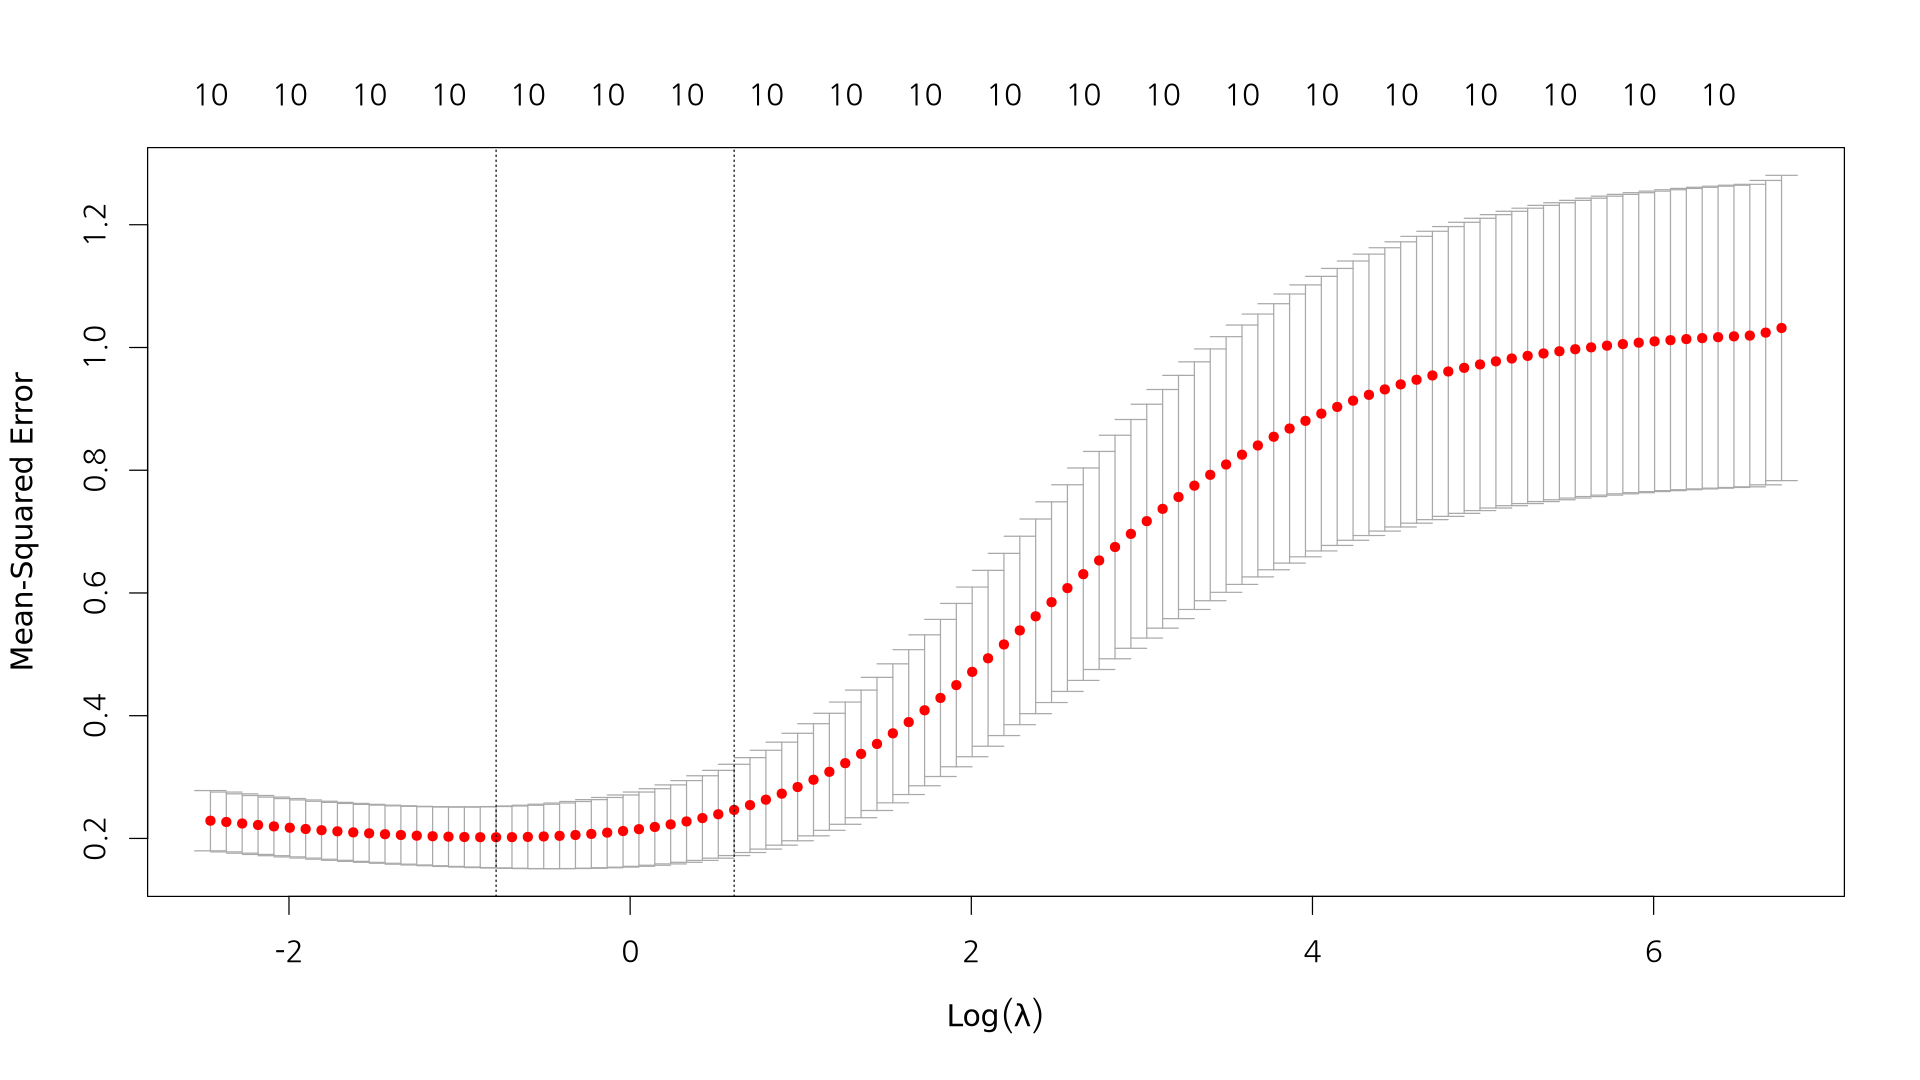

In [82]:
par(cex = 1.5)
plot(cv_fit)

> 굳이 왜 MSE가 더 큰 것을 써야 되나?? -> 그냥 람다 크게 쓰고 싶으니까...

In [86]:
cv_fit = cv.glmnet(X, y, alpha = 0, nfolds = 10)
cv_fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.5002    81  0.2169 0.05967      10
1se 2.2161    65  0.2764 0.10178      10

> 위에랑 거의 비슷한 lambda값이 나왔음.

In [87]:
ls(cv_fit)

[1] "call"       "cvlo"       "cvm"        "cvsd"       "cvup"      
 [6] "glmnet.fit" "index"      "lambda"     "lambda.1se" "lambda.min"
[11] "name"       "nzero"

In [88]:
cv_fit$index  ## 몇 번째 람다인지

,Lambda
min,81
1se,65


In [89]:
lam = cv_fit$lambda.min  ## 해
lam

[1] 0.5001864

In [90]:
log(lam)

[1] -0.6927744

In [92]:
cv_fit$cvm[81]  ## cv measure : MSE

[1] 0.2169125

In [93]:
cv_fit$cvsd[81]  ## sv standard deviation

[1] 0.0596723

In [94]:
cv_fit$lambda.1se  ## MSE + 1*s.e

[1] 2.216137

In [96]:
cv_fit$lambda[65]  ## call with index

[1] 2.216137

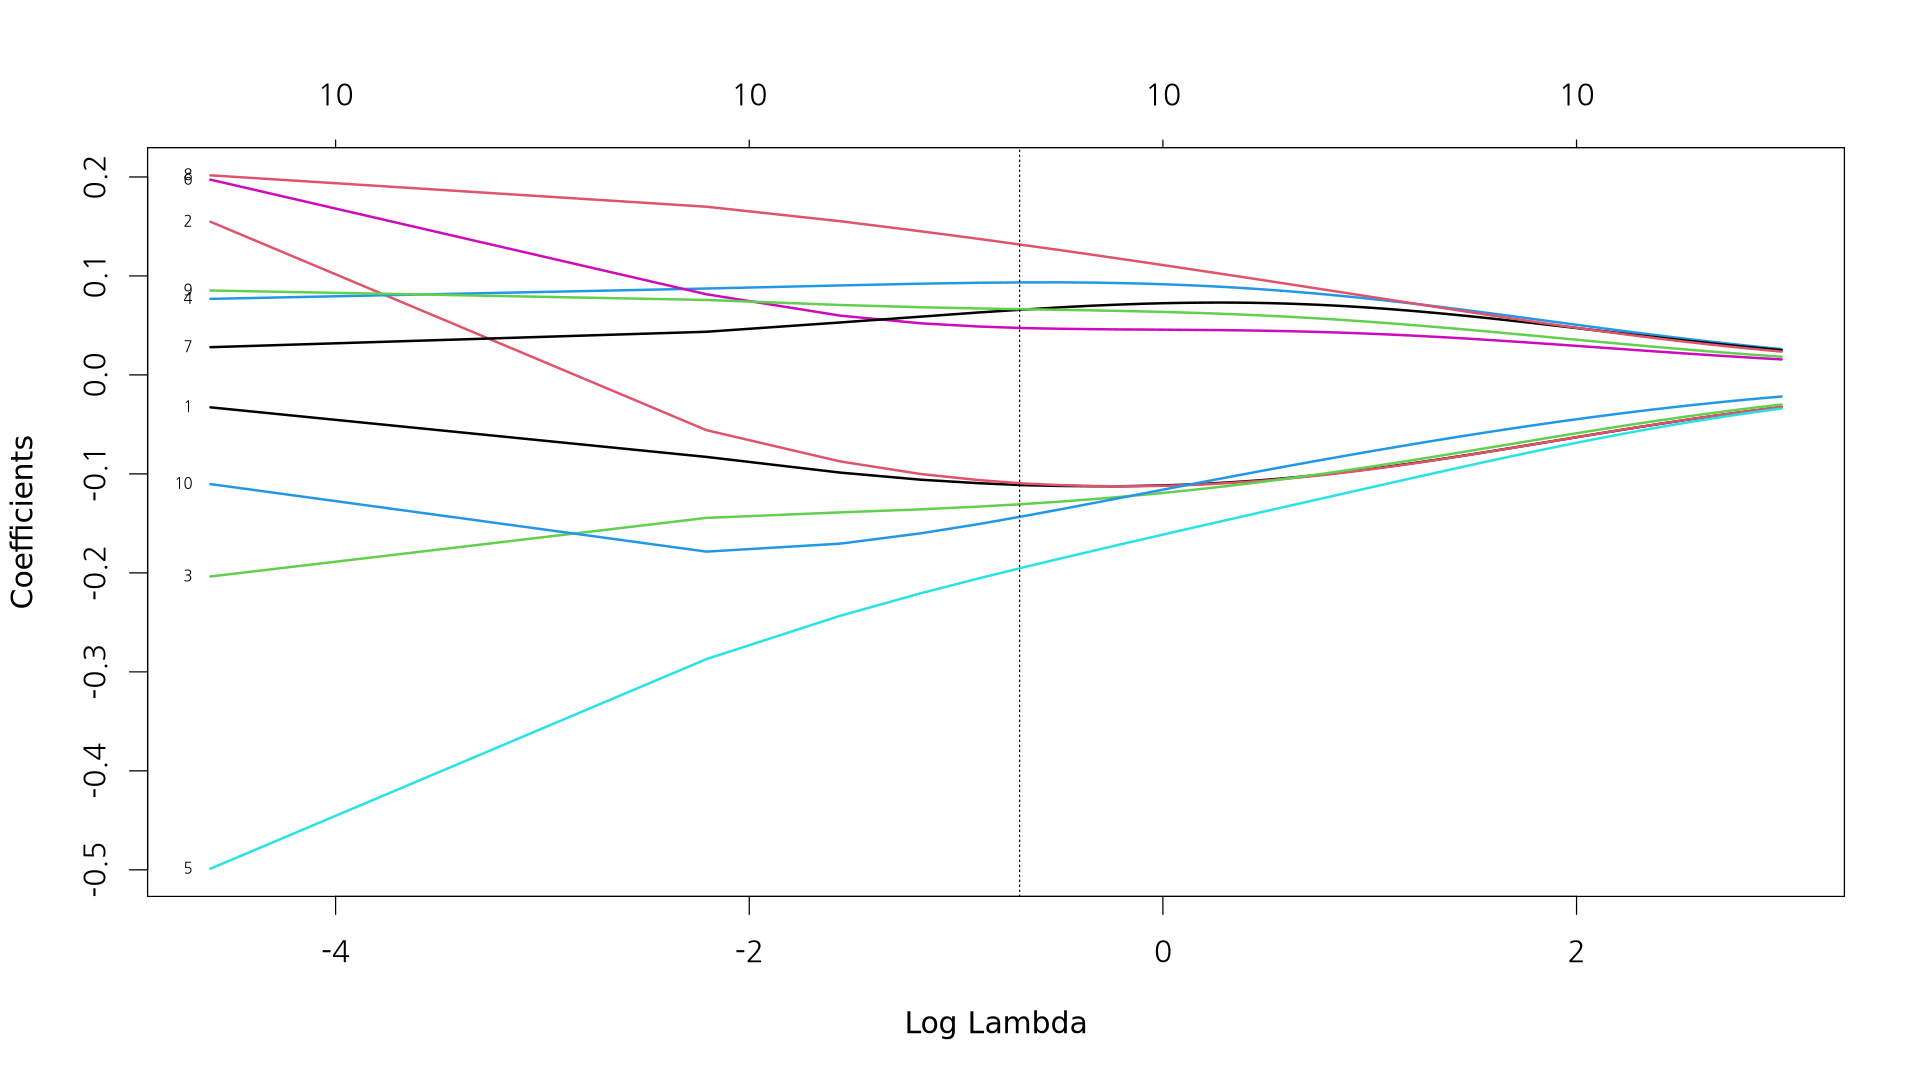

In [97]:
par(cex = 1.5)
plot(ridge_fit, label = TRUE, xvar = "lambda", lwd = 2)
abline(v = log(lam), lty = 3)

> 그 뭐냐, 능형 트레이스 느낌으로다가.

In [98]:
predict(ridge_fit, type = "coefficients", s = lam)  ## lam : glmnet에서 구한 lambda 해

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  8.350503e-17
cyl         -1.111861e-01
disp        -1.093455e-01
hp          -1.307062e-01
drat         9.342524e-02
wt          -1.954335e-01
qsec         4.746741e-02
vs           6.573455e-02
am           1.317846e-01
gear         6.643998e-02
carb        -1.434548e-01

### Lasso

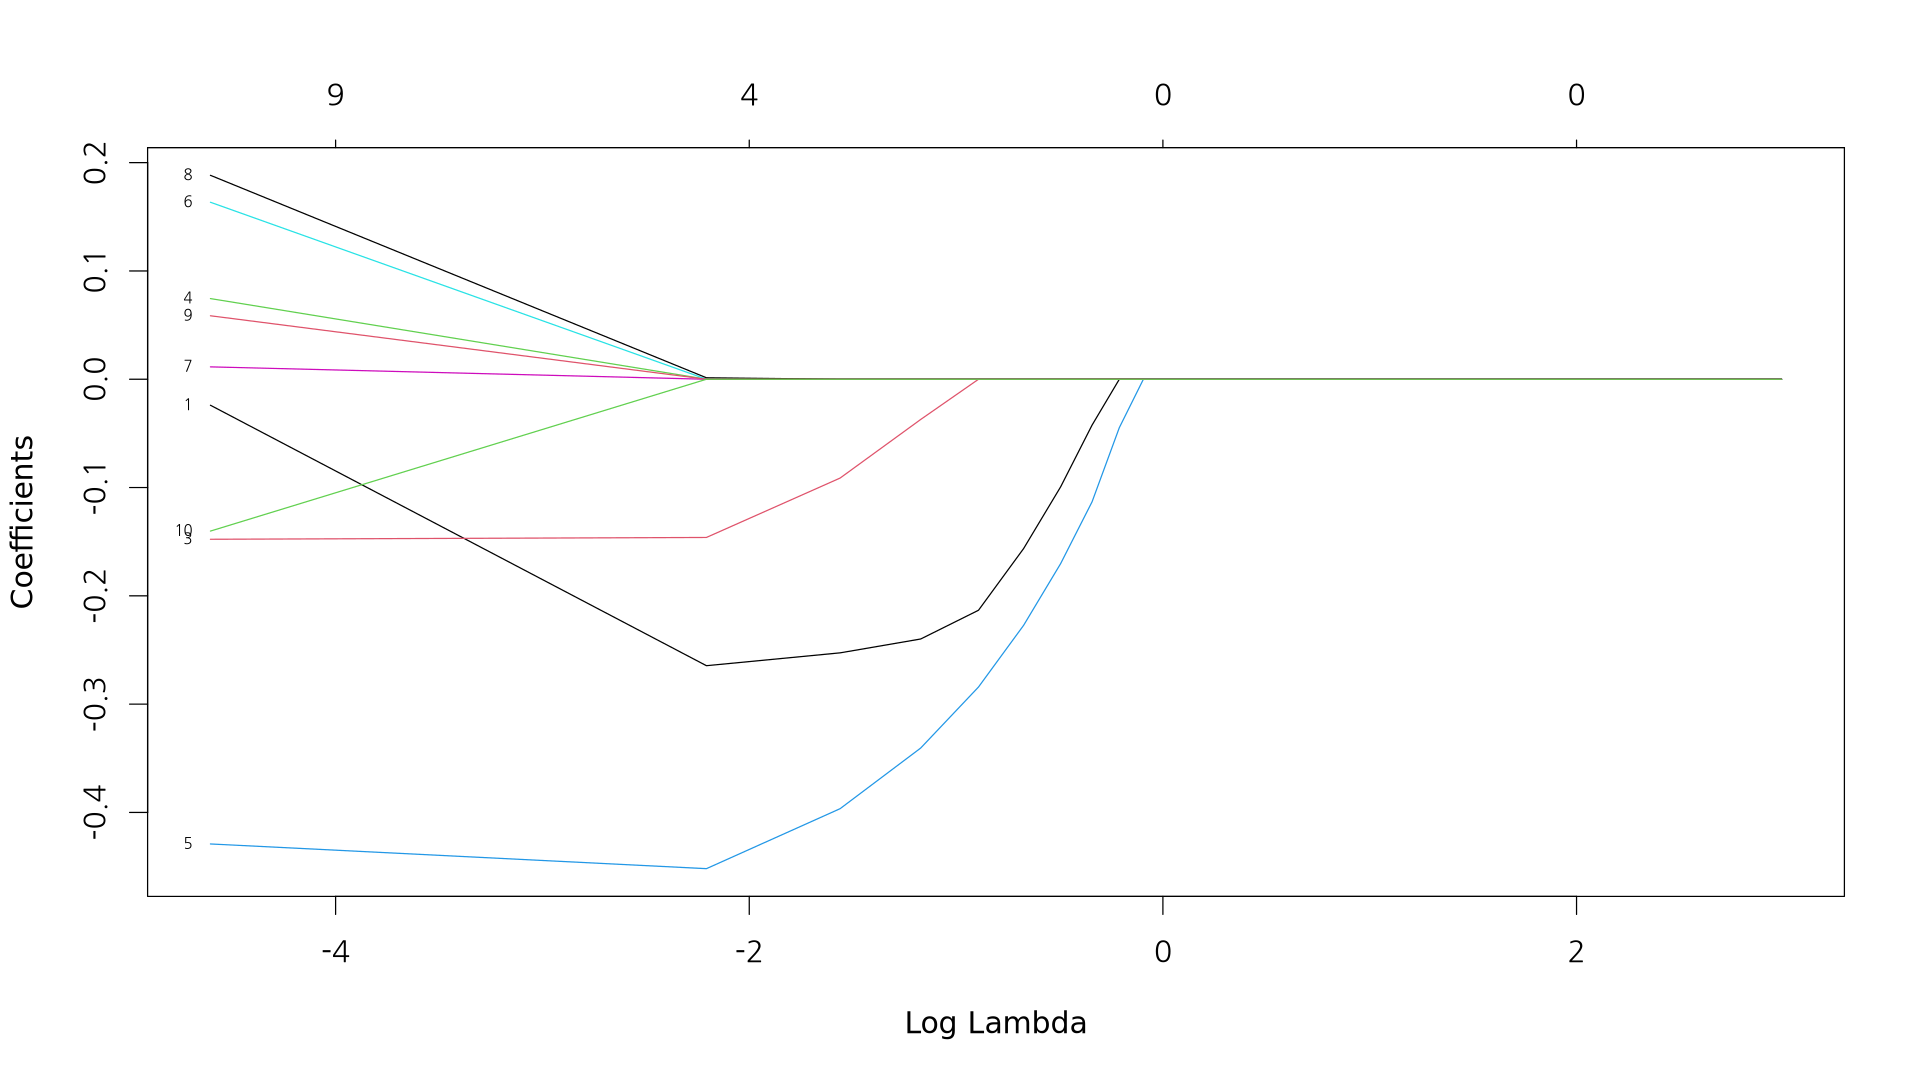

In [99]:
lasso_fit = glmnet(X, y, alpha = 1, lambda = seq(0.01, 20, 0.1))  ## Lasso : alpha = 1

par(cex = 1.5)
plot(lasso_fit, label = TRUE, xvar = "lambda")

> lambda를 크게 해나감에 따라 0이 되는 계수가 존재함. Ridge는 0이 절대 되지는 않고 수렴할 뿐...

In [100]:
cv_lasso_fit = cv.glmnet(X, y, alpha = 1, nfolds = 10)
cv_lasso_fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.1005    24  0.2252 0.05178       5
1se 0.2322    15  0.2697 0.07727       3

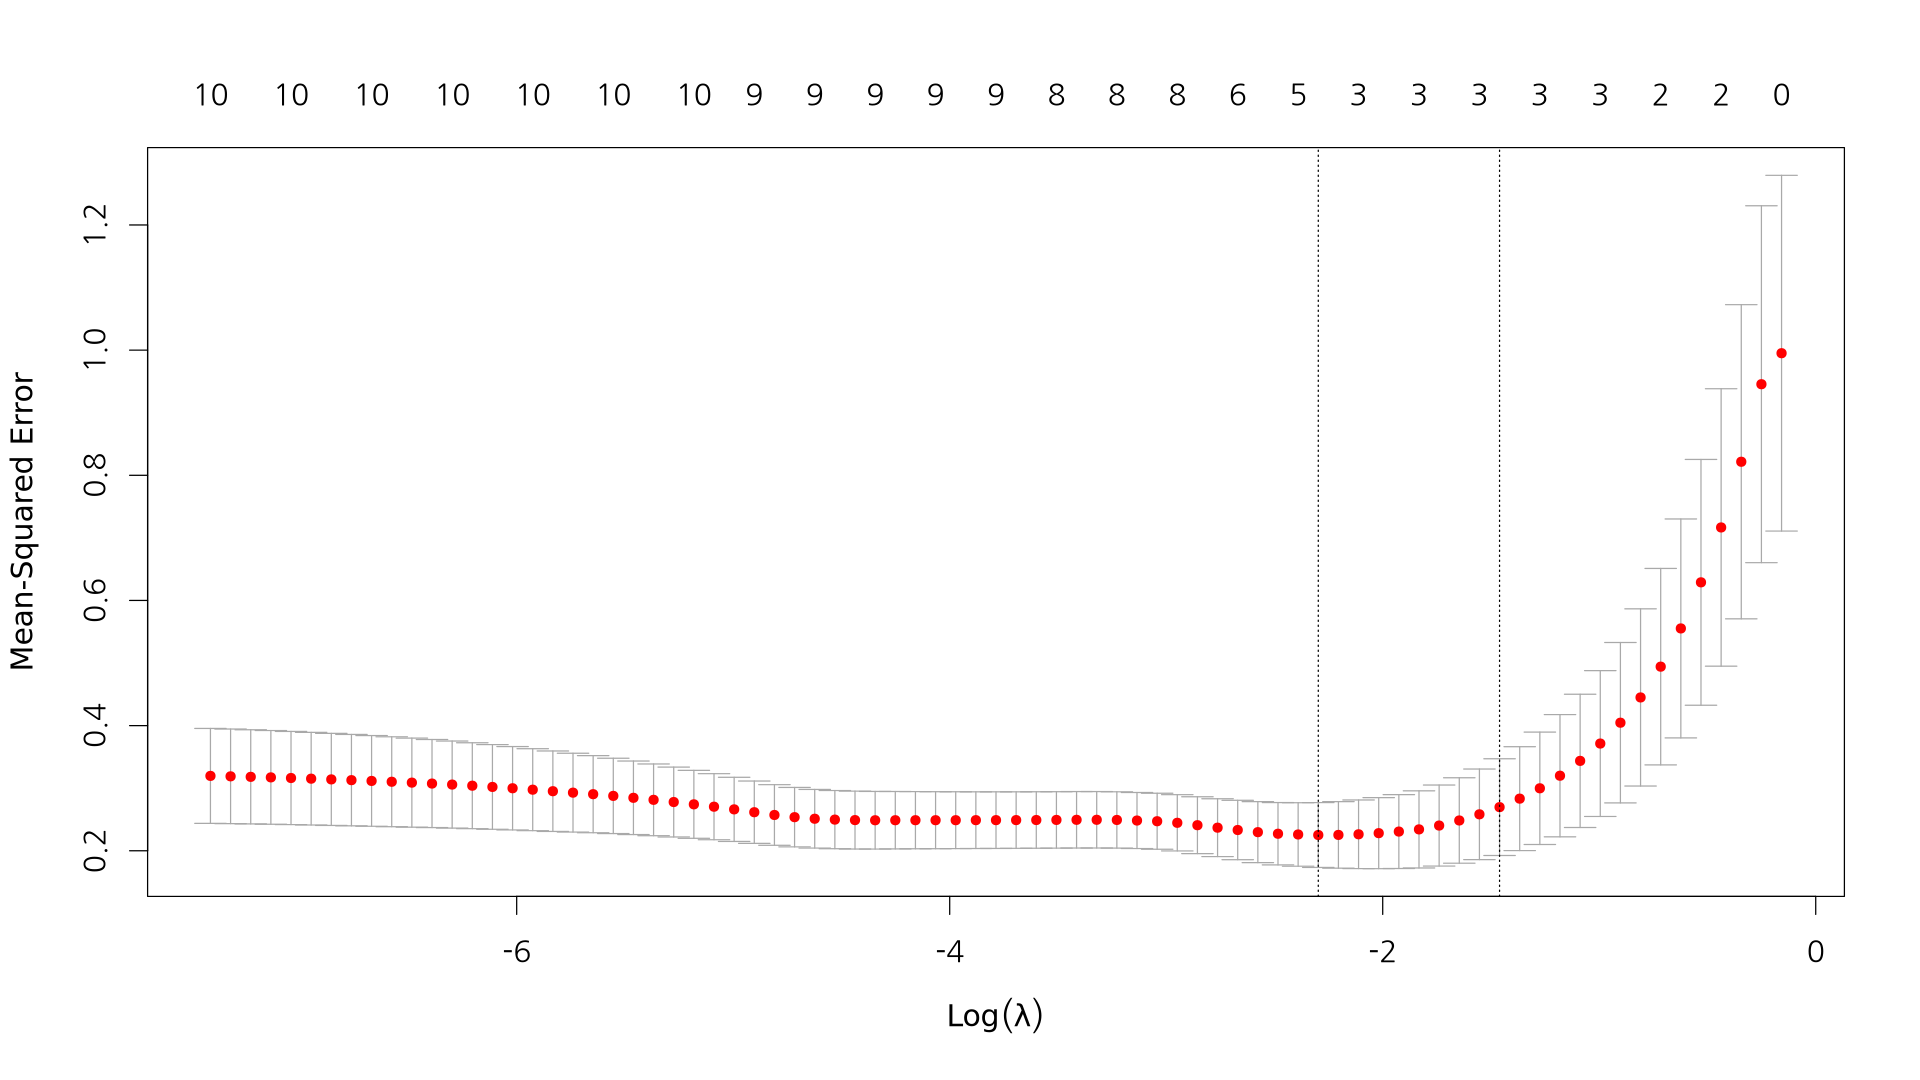

In [101]:
par(cex = 1.5)
plot(cv_lasso_fit)

In [102]:
lam_lasso = cv_lasso_fit$lambda.min  ## 최적해
lam_lasso

[1] 0.1004991

In [103]:
predict(lasso_fit, type = "coefficients", s = lam_lasso)

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  9.804366e-17
cyl         -2.416471e-01
disp         .           
hp          -1.462541e-01
drat         7.076104e-03
wt          -4.497580e-01
qsec         1.552613e-02
vs           1.085493e-03
am           1.911831e-02
gear         5.567542e-03
carb        -1.332008e-02

전체 데이터에서 해당 lambda값을 택하여 lasso를 함.

In [104]:
predict(lasso_fit, type = "coefficients", s = 0.2)  ## lambda가 조금만 커져도 많이 사라짐.

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  1.020553e-16
cyl         -2.538230e-01
disp         .           
hp          -9.671339e-02
drat         .           
wt          -4.020572e-01
qsec         .           
vs           .           
am           1.358559e-04
gear         .           
carb         .           